# Inaugural Project

### The project displays an exchange economy with two consumers and two goods. They each have an initial endowment of both goods and cobb-douglas utility functions. Optimal allocations are found under different conditions and the results are plotted in a graph.

> **Note the following:** 
The `inauguralproject.py` file includes a definitions of functions which is used multiple times in this notebook.

# Imports and set magics:

In [51]:
# Import modules
import numpy as np
from types import SimpleNamespace
from scipy import optimize 
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes.
%load_ext autoreload
%autoreload 2

# Call the model from the py-file
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

I use the utility functions defined in the py-file, and set up a for-loop with conditions for pareto improvements of the initial endowment.

In [52]:
# Create the set C
N = 75
list_C = [i/N for i in range(N+1)]

# Create empty lists for the results
x1A_pareto = []
x2A_pareto = []

# Set up conditions for pareto improvements and append the pareto approvements to the empty lists
for x1A in list_C:
    for x2A in list_C:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A,x2A)>=model.utility_A(par.w1A,par.w2A) and model.utility_B(x1B,x2B)>=model.utility_B(par.w1B,par.w2B):
            x1A_pareto.append(x1A)
            x2A_pareto.append(x2A)

I plot the pareto improvement below with pink circles. The initial endowment is shown by the black square.

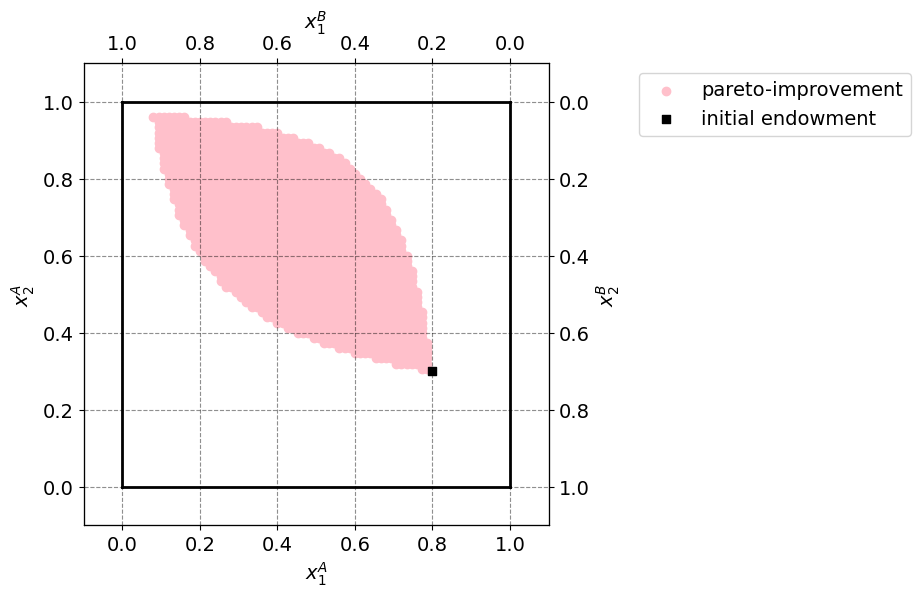

In [53]:
# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot the possible pareto-improvements
ax_A.scatter(x1A_pareto , x2A_pareto , marker='o', color='pink', label='pareto-improvement')
# Plot the initial endowment
ax_A.scatter(par.w1A , par.w2A , marker='s' , color='black' , label='initial endowment')


# Limits for the figure
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

The plot shows that consumer A will prefer to have more of good 2 and less of good 1, than she is getting with the initial endowment, while consumer B will prefer to have more of good 1 and less of good 2, than he is getting with the initial endowment. 

# Question 2

I create a list that the price of ggood 1, $p_1$, should be part of and use a for-loop on the check_market_clearing function from the py-file to print the market errors for given prices of p1.

In [54]:
# Create discrete list for p1
N = 75
p_1 = [0.5+2*i/N for i in range(N+1)]

# Empty list for the errors
list_error1 = []
list_error2 = []

# Solve check_market_clearing-model in py-file to find errors
for p1 in p_1:
    error = model.check_market_clearing(p1)
    print(f'When the price of good 1 is {p1:.3f} the errors are {error[0]:.3f}, {error[1]:.3f}')
    list_error1.append(error[0])
    list_error2.append(error[1])

When the price of good 1 is 0.500 the errors are 0.533, -0.267
When the price of good 1 is 0.527 the errors are 0.476, -0.251
When the price of good 1 is 0.553 the errors are 0.424, -0.235
When the price of good 1 is 0.580 the errors are 0.377, -0.219
When the price of good 1 is 0.607 the errors are 0.334, -0.203
When the price of good 1 is 0.633 the errors are 0.295, -0.187
When the price of good 1 is 0.660 the errors are 0.259, -0.171
When the price of good 1 is 0.687 the errors are 0.225, -0.155
When the price of good 1 is 0.713 the errors are 0.194, -0.139
When the price of good 1 is 0.740 the errors are 0.166, -0.123
When the price of good 1 is 0.767 the errors are 0.139, -0.107
When the price of good 1 is 0.793 the errors are 0.114, -0.091
When the price of good 1 is 0.820 the errors are 0.091, -0.075
When the price of good 1 is 0.847 the errors are 0.069, -0.059
When the price of good 1 is 0.873 the errors are 0.049, -0.043
When the price of good 1 is 0.900 the errors are 0.030,

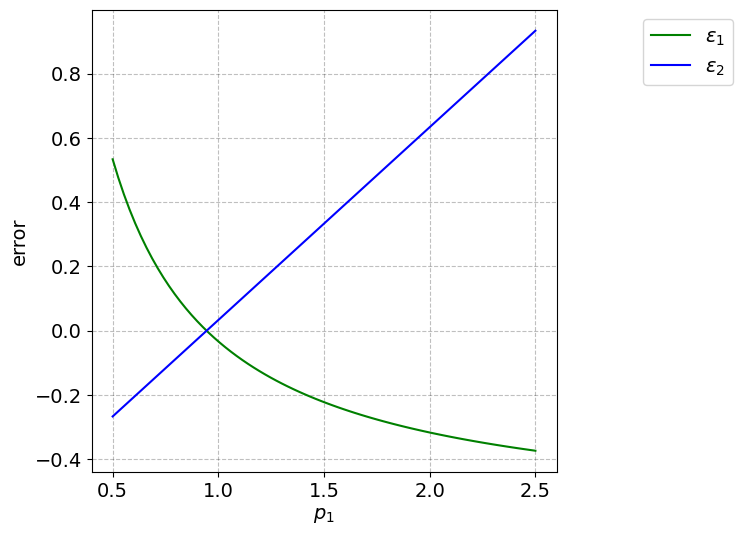

In [55]:
# Plot the errors in a line plot
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
plt.plot(p_1, list_error1, color='green', label='$\epsilon_1$')
plt.plot(p_1, list_error2, color='blue', label='$\epsilon_2$')
plt.xlabel('$p_1$')
plt.ylabel('error')
plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.4,1.0))
plt.show()

From the print it is clear that there is a root where $\epsilon_1$ changes from a positive number to a negtive number, and $\epsilon_2$ changes from a negative number to a positive number. 
From the printed list it is clear that the market clearing price for $p_1$ is then between 0,927 and 0,953

# Question 3

I use the optimizer to find the market clearing price, by searching for the root of $\epsilon_1$. 

In [56]:
# Define an objective function (to find root)
def obj(p1):
    return model.check_market_clearing(p1)[0]

market_clearing_price = []

# The function optimize.root will solve objective = 0 starting from x0 = 1, which is the guess of the price of p1
res = optimize.root(obj, 1)

market_clearing_price = res.x[0]

# Print the market clearing price
print(f'The market clearing price: {res.x[0]:.3f}, so the allocation for consumer A is x1A = {model.demand_A(market_clearing_price)[0]:.3f} and x2A = {model.demand_A(market_clearing_price)[1]:.3f}')
print(f'The allocation for consumer B is x1B = {model.demand_B(market_clearing_price)[0]:.3f} and x2B = {model.demand_B(market_clearing_price)[1]:.3f}')

The market clearing price: 0.944, so the allocation for consumer A is x1A = 0.373 and x2A = 0.704
The allocation for consumer B is x1B = 0.627 and x2B = 0.296


The market clearing price is $p_1$ = 0.944 when $p_2$ = 1 (set as numeraire).
The walras law states that market clearing in n-1 markets also insures market clearing in the last market. 

# Question 4a

I find the allocation when A maximizes her own utility, while she can only choose prices in `p1`

In [57]:
# Set initial max utility of A to minus infinity
max_utility_A = -np.inf

# Create empty lists for the optimal allocation and prices 
max_prices = []
x1A_4a = []
x2A_4a = []

# Loop over the elements in p_1
for p1 in p_1:
    x1B,x2B = model.demand_B(p1)
    if 1 - x1B > 0 and 1 - x2B > 0:
        utility_A = model.utility_A(1 - x1B , 1 - x2B)

        if utility_A > max_utility_A:
            max_utility_A = utility_A
            max_prices = p1
            x1A_4a = (1 - x1B)
            x2A_4a = (1 - x2B)

# Print the results
print(f'Consumer A chooses the price for good 1 to be {max_prices:.3f}, and the allocation x1A = {x1A_4a:.3f} and x2A = {x2A_4a:.3f}, which gives consumer A the utility {max_utility_A:.3f}')
print(f'The allocation for consumer B is x1B = {1-x1A_4a:.3f} and x2B = {1-x2A_4a:.3f}, which gives consumer B the utility {model.utility_B((1-x1A_4a),(1-x2A_4a)):.3f}')

Consumer A chooses the price for good 1 to be 1.887, and the allocation x1A = 0.619 and x2A = 0.641, which gives consumer A the utility 0.634
The allocation for consumer B is x1B = 0.381 and x2B = 0.359, which gives consumer B the utility 0.373


# Question 4b

I find the allocation when A maximizes her own utility and can choose any positive price 

In [58]:
# Define the objective function as a function of the negative utility of A depending on the variable p1
def obj_price(p1):
    x1B_4b , x2B_4b = model.demand_B(p1)
    return - model.utility_A(1-x1B_4b , 1-x2B_4b)

# Create empty lists for the optimal allocation and prices 
x1A_4b = []
x2A_4b = []

# Use optimizer to minimize the negative utility, and set initial price guess to 1
result = optimize.minimize(obj_price, 1)

# Append result to lists
# Price
p1_4b = result.x[0]
# Allocation for B
model.demand_B(p1_4b)
# Allocation for A
x1A_4b = 1-model.demand_B(p1_4b)[0]
x2A_4b = 1-model.demand_B(p1_4b)[1]

# Print the results
print(f'Consumer A chooses the price for good 1 to be {p1_4b:.3f}, and the allocation x1A = {x1A_4b:.3f} and x2A = {x2A_4b:.3f}, which gives consumer A the utility {-obj(p1_4b):.3f}')
print(f'The allocation for consumer B is x1B = {model.demand_B(p1_4b)[0]:.3f} and x2B = {model.demand_B(p1_4b)[1]:.3f}, which gives consumer B the utility {model.utility_B((model.demand_B(p1_4b)[0]),model.demand_B(p1_4b)[0]):.3f}')


Consumer A chooses the price for good 1 to be 1.899, and the allocation x1A = 0.621 and x2A = 0.640, which gives consumer A the utility 0.302
The allocation for consumer B is x1B = 0.379 and x2B = 0.360, which gives consumer B the utility 0.379


It is clear that the difference in the allocation is minor between 4a and 4b, and the utility for A is the same. 

# Question 5a

I find the allocation when the choice set is restricted to `C` and consumer B can not be worse of than with his initial endowment

In [59]:
# Set initial max utility of A to minus infinity
max_utility_A = -np.inf

# Zip together the element C, from the results given in question 1
C = zip(x1A_pareto , x2A_pareto)

# Loop over the elements in C
for x_1 , x_2 in C:
    utility_5a = model.utility_A(x_1,x_2)
    if model.utility_A(x_1,x_2) >= max_utility_A and model.utility_B(1 - x_1 , 1 - x_2) > model.utility_B(par.w1B , par.w2B):
            max_utility_A = utility_5a
            x1A_5a = x_1
            x2A_5a = x_2

# Print the results
print(f'Consumer A chooses the allocation to be x1A = {x1A_5a:.3f} and x2A = {x2A_5a:.3f}, which gives consumer A the utility {max_utility_A:.3f}')
print(f'The allocation for consumer B is x1B = {1-x1A_5a:.3f} and x2B = {1-x2A_5a:.3f}), which gives consumer B the utility {model.utility_B((1-x1A_5a),(1-x2A_5a)):.3f}')

Consumer A chooses the allocation to be x1A = 0.560 and x2A = 0.853, which gives consumer A the utility 0.742
The allocation for consumer B is x1B = 0.440 and x2B = 0.147), which gives consumer B the utility 0.305


# Question 5b

I find the allocation with no restrictions other than consumer B can not be worse off than in the initial endowment

In [60]:
# Define objective function as the negative utility of A and B 
def obj_none(xA):
    return - (model.utility_A(xA[0],xA[1])) 

# Set constraints for utility of B  (violated if negative)
constraints = ({'type': 'ineq', 'fun' : lambda xA: model.utility_B((1-xA[0]), 1-xA[1]) - model.utility_B(par.w1B , par.w2B) })

# Set bounds for the allocation         
bounds = ((0,1),(0,1))
                
# Set guess for allocation
x0 = [0.1,0.1]

# Use optimizer to minimize the negative utility, given the bounds and constraints
result = optimize.minimize(obj_none,x0,method='SLSQP',bounds=bounds, constraints=constraints)
x1A_5b, x2A_5b = result.x

# Print the results
print(f'Consumer A chooses the allocation to be x1A = {x1A_5b:.3f} and x2A = {x2A_5b:.3f}), which gives consumer A the utility {model.utility_A(x1A_5b,x2A_5b):.3f}')
print(f'The allocation for consumer B is x1B = {1-x1A_5b:.3f} and x2B = {1-x2A_5b:.3f}), which gives consumer B the utility {model.utility_B((1-x1A_5b),(1-x2A_5b)):.3f}')

Consumer A chooses the allocation to be x1A = 0.576 and x2A = 0.844), which gives consumer A the utility 0.743
The allocation for consumer B is x1B = 0.424 and x2B = 0.156), which gives consumer B the utility 0.304


# Question 6a

I find the allocation when a social planner maximizes aggregate utility

In [61]:
# Define objective function as the negative utility of A and B 
def obj_soc(xA): 
    return -(model.utility_A(xA[0],xA[1]) + model.utility_B((1 - xA[0]),(1 - xA[1]))) 

# Set bounds for the allocation         
bounds = ((0,1),(0,1))
                
# Set guess for the allocation
x0 = [0.1,0.1]

# Use optimizer to minimize the negative utility, given the bounds
result = optimize.minimize(obj_soc,x0,method='SLSQP',bounds=bounds)
x1A_social, x2A_social = result.x

# Print the results found by social planner
print(f'The allocation for consumer A is x1A = {x1A_social:.3f} and x2A = {x2A_social:.3f}, which gives utility {model.utility_A(x1A_social,x2A_social):.3f}')
print(f'The allocation for consumer B is x1B = {1-x1A_social:.3f} and x2B = {1-x2A_social:.3f}, which gives utility {model.utility_B((1-x1A_social),(1-x2A_social)):.3f}')

The allocation for consumer A is x1A = 0.333 and x2A = 0.667, which gives utility 0.529
The allocation for consumer B is x1B = 0.667 and x2B = 0.333, which gives utility 0.529


# Question 6b

I plot the diffenrent allocations found in question 3, 4a, 4b, 5a, 5b and 6a in the Edgeworth box

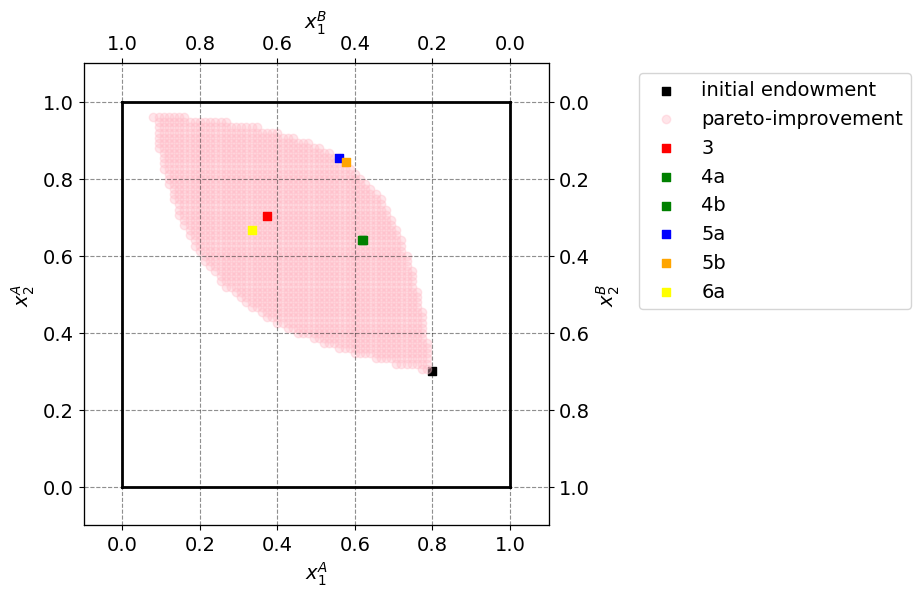

In [62]:
# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()


# Plot the initial endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='initial endowment')
# Plot the possible pareto-improvements
ax_A.scatter(x1A_pareto,x2A_pareto,marker='o',alpha=0.4 , color='pink',label='pareto-improvement')
# Plot the solution from question 3
ax_A.scatter(model.demand_A(market_clearing_price)[0] , model.demand_A(market_clearing_price)[1] , marker='s' , color='red' , label='3')
# Plot the solution from question 4a
ax_A.scatter(x1A_4a, x2A_4a, marker='s' , color='green',label='4a')
# Plot the solution from question 4b
ax_A.scatter(x1A_4b, x2A_4b, marker='s' , color='green',label='4b')
# Plot the solution from question 5a
ax_A.scatter(x1A_5a, x2A_5a , marker='s' , color='blue',label='5a')
# Plot the solution from question 5b
ax_A.scatter(x1A_5b , x2A_5b , marker='s' , color='orange',label='5b')
# Plot the solution from question 6a
ax_A.scatter(x1A_social , x2A_social , marker='s' , color='yellow',label='6a')


# Limits for the figure
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

Both 4a and 4b are marked as green, as their results are plotted so close together. 
The plot illustrates that consumer A gets more utility from good 2 while consumer B gets more utility from good 1, and hence the allocations shows that consumer A should have more of good 2 than good 1 to maximize utility, while consumer B should have more of good 1 than good 2 to maximize utility. 

# Question 7

I draw a set of 50 random elements which is uniformly distributed and plot them

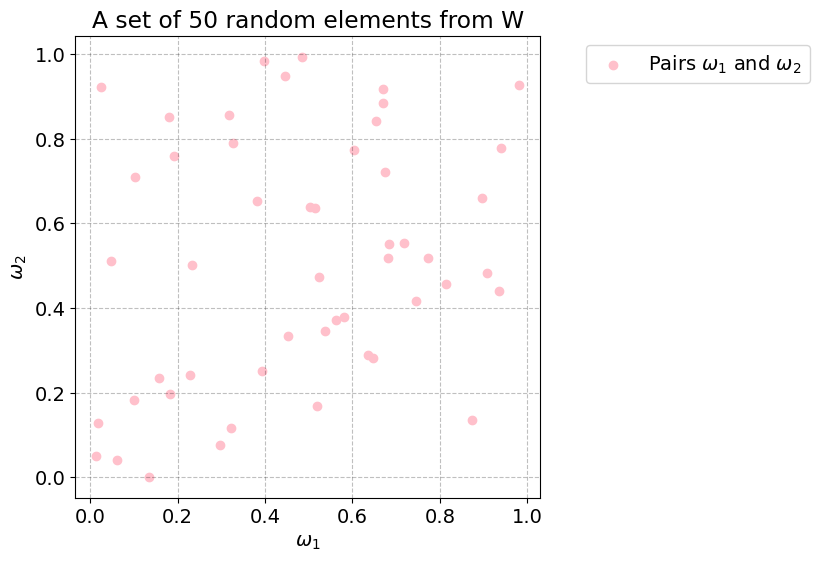

In [63]:
np.random.seed(2002)

# Defining the function W with the two elements with a uniform distribution 
w_1_A = np.random.uniform(0 , 1, 50) 
w_2_A = np.random.uniform(0 , 1, 50)  
W = zip(w_1_A , w_2_A)


# Display the 50 elements in a scatterplot
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
plt.title('A set of 50 random elements from W')
plt.scatter(w_1_A, w_2_A, color='pink', marker='o', label='Pairs $\omega_1$ and $\omega_2$')
plt.xlabel('$\omega_1$')
plt.ylabel('$\omega_2$')
plt.grid(True)
plt.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0))
plt.show()


# Question 8

I find the equilibrium allocation for the random elements which is in C and plot them 

In [64]:
# Create empty lists for the result
x1A_walras = []
x2A_walras = []

x1A_w = []
x2A_w = []

# Set price to market clearing price, given in question 3
p1 = res.x[0]

# Set up while loop
for i in range(50):
    x1A_8 = par.alpha * (p1 * w_1_A[i] + 1 * w_2_A[i]) / (p1)
    x2A_8  = (1 - par.alpha) * (p1 * w_1_A[i] + 1 * w_2_A[i]) / 1
    
    x1A_walras.append(x1A_8)
    x2A_walras.append(x2A_8)

    i+=1

for x1A, x2A in zip(x1A_walras, x2A_walras):
    x1B = 1 - x1A
    x2B = 1 - x2A
    if (model.utility_A(x1A, x2A) >= model.utility_A(par.w1A,par.w2A) and
            model.utility_B(x1B, x2B) >= model.utility_B(par.w1B,par.w2B)):
        x1A_w.append(x1A)
        x2A_w.append(x2A)



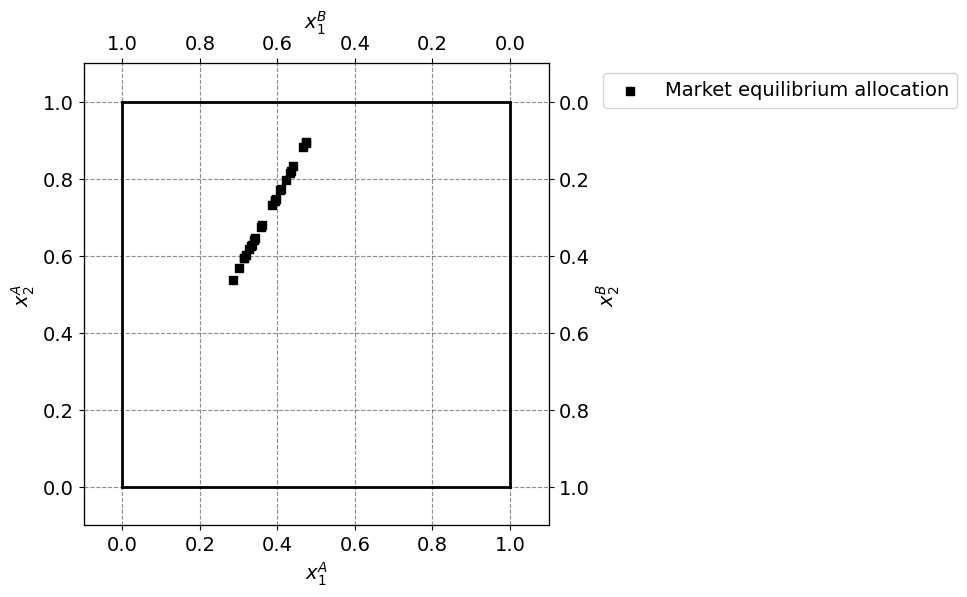

In [65]:
# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")


temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()


# Plot the initial endowment
ax_A.scatter(x1A_w,x2A_w,marker='s',color='black',label='Market equilibrium allocation')


# Limits for the figure
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.9,1.0));

plt.show()

# Conclusion

The Walras exchange economy is displayed in the above project. 
The project shows how different restrictions on the price and choice sets gives different equilibriums. 
The highest utility for consumer A is 0,743, when no restictions other than consumer B must not be worse of than in their initial endowment are given, shown in question 5b. 
The social planner ensures that both consumer A and B are equally well of in terms of utility.